# Minimisation

As we have touched on already, the `curve_fit` function uses **least-squares regression** to fit models to datasets. Mathematically, this corresponds to the following process:

$$\mathrm{arg\,min}_{\theta} \sum_{i} [y_{i} - f_{\theta}(x_{i})]^{2},$$

where each $y_{i}$ is an experimental $y$-value and each $f_{\theta}(x_{i})$ is our model's prediction for that $y$-value for a given set of model parameters $\theta$. To clarify what we mean by "model parameters", in the context of a linear model, these would be the slope $m$ and the intercept $c$, whereas for a quadratic model, these would be $a$, $b$ and $c$ as per the standard form of a quadratic equation.

So, what `curve_fit` is really doing under the hood is **minimising** $[y_{i} - f_{\theta}(x_{i})]^{2}$ with respect to $\theta$. Hopefully you can see where the term "least-squares" comes from: we are minimising the **sum of squared differences** between the experimental data and our model's predictions. When we provide information about the variance of individual data points via the `sigma` argument, we move from **ordinary** least-squares to **weighted** least-squares:

$$\mathrm{arg\,min}_{\theta} \sum_{i} \frac{[y_{i} - f_{\theta}(x_{i})]^{2}}{\sigma^{2}_{i}},$$

where each $\sigma_{i}$ is the variance associated with a given $y$-value. By dividing by the variance of each data point, we effectively **weight** our final model to stick closer to the data points with **lower** variance.

---

The brief explanation above is present for two reasons. Firstly, it is there simply to explain how the `curve_fit` function actually works, so that it seems like less of a "black box". Secondly, it showcases quite nicely the power of **function minimisation**. When performing least-squares regression, we are minimising a sum of squared differences (sometimes called $\chi^{2}$), a function which calculates the error between a model's predictions and some dataset. This is one very useful example in the context of data analysis, but there are many more situations besides this in which we can solve problems by minimising the value of a given function.

For an abstract example, consider the function:

$$f(x) = x^{2}.$$

In [1]:
%config InlineBackend.figure_format='retina'

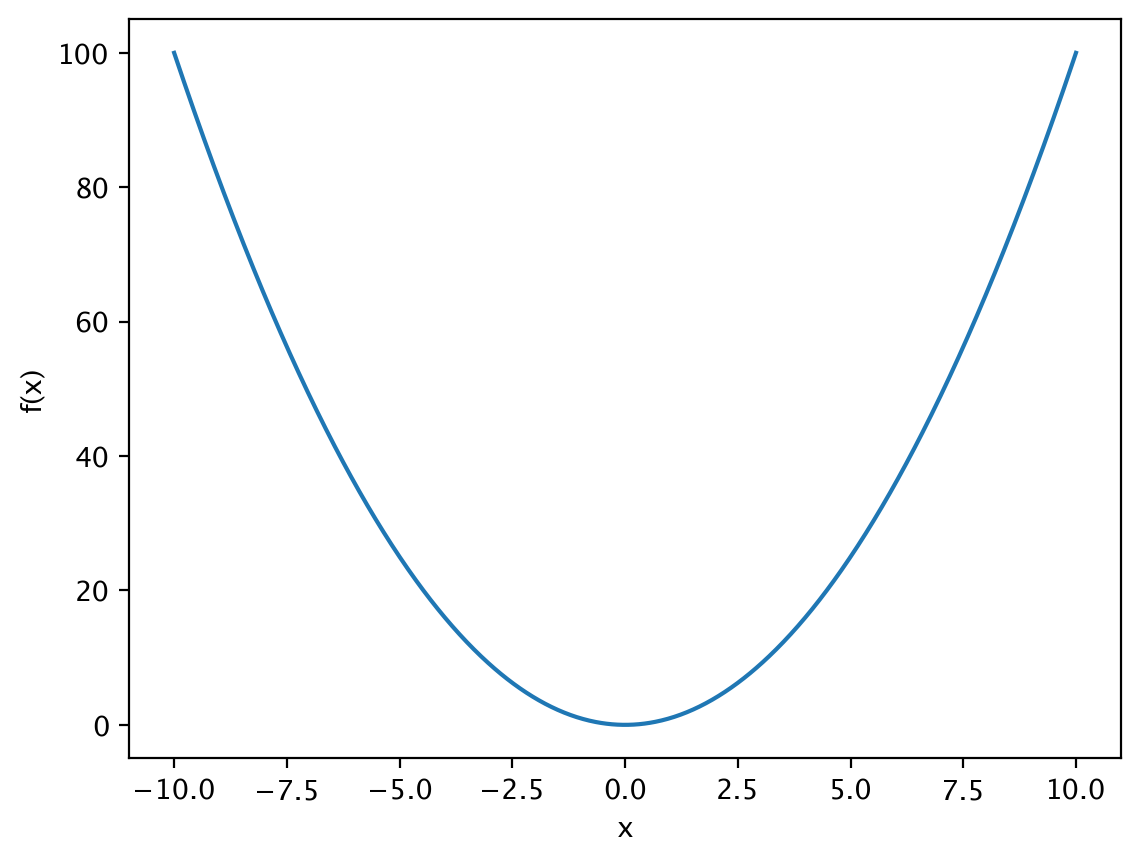

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
f_x = x ** 2

plt.plot(x, f_x)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Now obviously as human beings, we can find the minimum of this function **analytically** via calculus, but what if we wanted to minimise $f(x)$ **numerically**?

We can perform numerical minimisation with the `minimize` function, again from the `scipy` library:

In [3]:
from scipy.optimize import minimize

Similar to `curve_fit`, `optimize` requires us to define the function that we would like to minimise:

In [4]:
def x_squared(x):
    """Calculate f(x) = x^2 for a range of x-values.

    Args:
        x (np.ndarray): The x-values.

    Returns:
        np.ndarray: The value of f(x) for each input x.
        
    """

    return x ** 2

Now we can call the `minimize` function:

In [5]:
minimize(x_squared, x0=[5])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.914540092077327e-16
        x: [-2.630e-08]
      nit: 3
      jac: [-3.769e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4

Notice that we supplied `minimize` with **two** arguments: the name of the function that we would like to minimize `x_squared` and a list `[5]`. The second argument `x0` is our **initial guess** for the minimum. Now again, this is a somewhat trivial example, we **know** that the minimum is at $0$, but here we set our initial guess to $5$ to show that `minimize` can get to the correct result on its own. The reason that this argument is a `list` rather than a `float` is that the `minimize` function can minimise functions with respect to **multiple variables simultaneously** e.g. the set of parameters $\theta$ in least-squares regression (in which case you would need an initial guess for **each** of those variables).

As you can see above, the `minimize` function provides us with a lot of information. For now, we only really care about the `x` row, which contains the value of $x$ which minimises $f(x)$:

In [6]:
minimisation_data = minimize(x_squared, x0=[5])
x_min = minimisation_data.x[0] # Indexing used as minimize will return a numpy array even if there is only one variable being minimised).

print(f'arg min f(x) = {x_min} (very nearly 0)')

arg min f(x) = -2.6295513100293988e-08 (very nearly 0)


We can visualise the minimum by plotting it on top of our original curve:

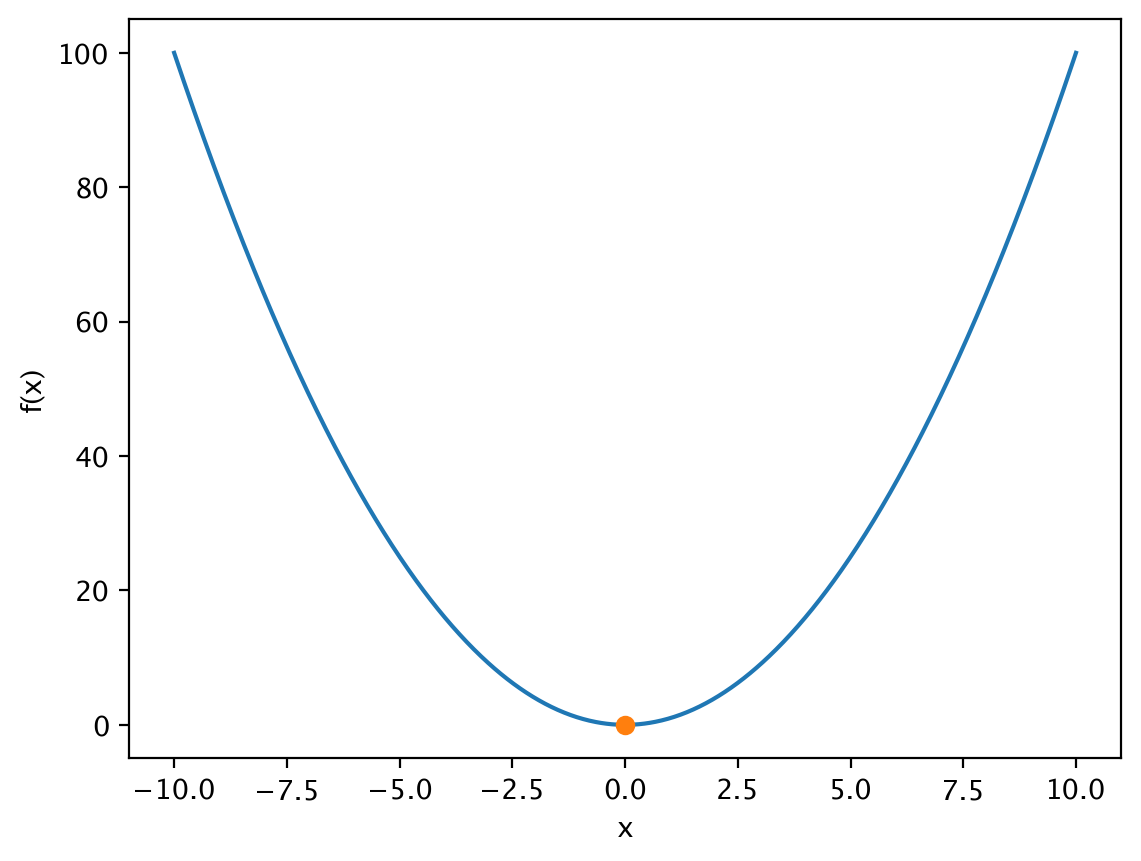

In [7]:
f_at_x_min = x_squared(x_min) # Get f(x) at x = x_min

plt.plot(x, f_x)
plt.plot(x_min, f_at_x_min, 'o')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

## Local minima

Minimising $x^{2}$ is not the most difficult task, both because it can be done analytically, and because it has a **single global minimum**. In other words, $x^{2}$ is at its lowest value at $x = 0$ and grows monotonically **everywhere** else from $-\infty$ to $\infty$. Most functions are, in this sense, not so friendly.

For example, consider the function:

$$f(x) = x^{2} - 10\cos{2\pi x} + 10.$$

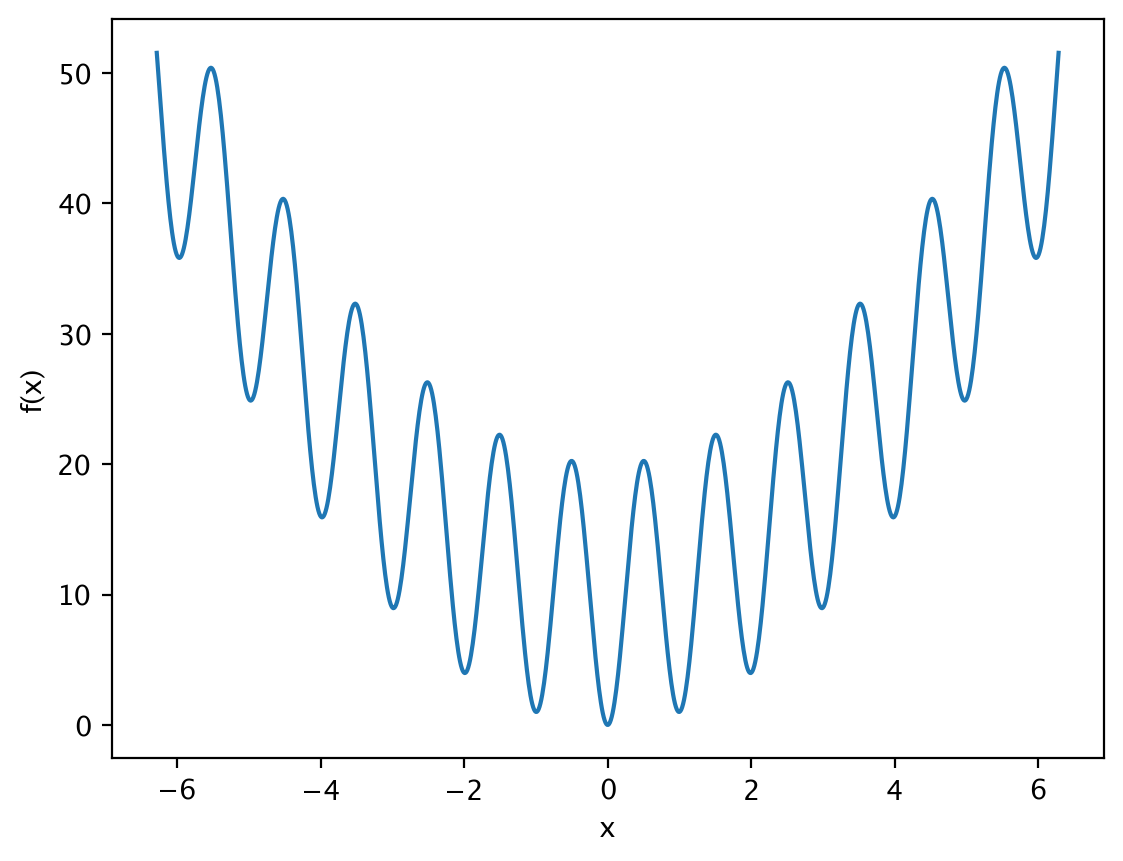

In [8]:
def oscillatory_quadratic(x):
    """Calculates f(x) = x^2 - 10 cos 2pi x + 10 for a range of x-values.

    Args:
        x (np.ndarray): The x-values.

    Returns:
        np.ndarray: The value of f(x) for each input x.
        
    """
    return x ** 2 - 10 * np.cos(2 * np.pi * x) + 10

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
f_x = oscillatory_quadratic(x)

plt.plot(x, f_x)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Again it's easy enough for us to **see** that the minimum is at $x = 0$, but let's try to compute this **numerically**.

In [9]:
minimisation_data = minimize(oscillatory_quadratic, x0=[5.25])
min_x = minimisation_data.x[0]

print(f'arg min f(x) = {min_x}')

arg min f(x) = -0.9949586450236011


Oh dear, this time we're not getting $x = 0$.

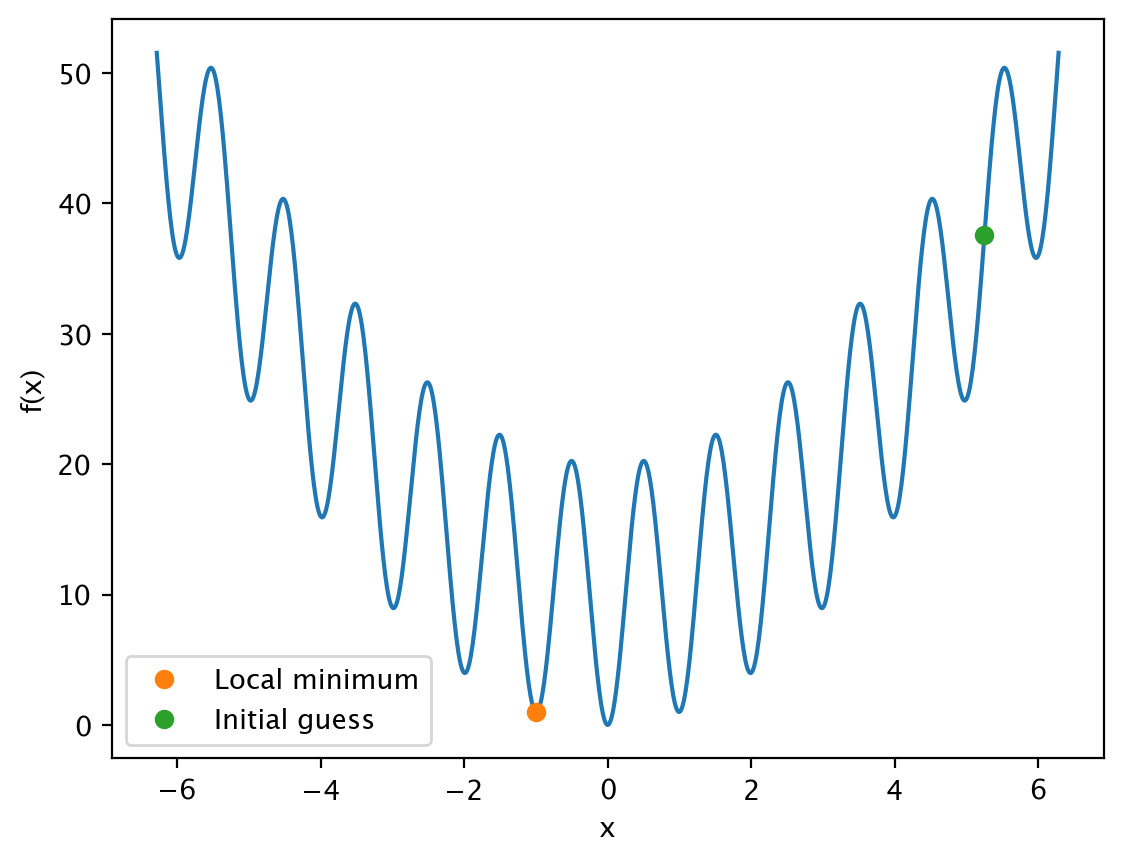

In [10]:
initial_guess = 5.25
# get f(x) at the initial guess and at x_min
init_f_x = oscillatory_quadratic(initial_guess)
f_x_at_min = oscillatory_quadratic(min_x)

plt.plot(x, f_x)
plt.plot(min_x, f_x_at_min, 'o', label='Local minimum')
plt.plot(initial_guess, init_f_x, 'o', label='Initial guess')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

As you can see, the `minimize` function has located a **local** minimum at $x \approx -1$, but has failed to reach the **global** minimum at $x = 0$.

This example highlights nicely that using the `minimize` function - and more generally the process of [function optimisation](https://en.wikipedia.org/wiki/Mathematical_optimization) - is not always as straightforward as our $x^{2}$ example. Let's take a second to think about **why** we might get stuck in a **local** minimum. If we were to find the minimum **analytically**, we would **differentiate** $f(x)$ and set the **derivative** to zero:

$$\frac{df(x)}{dx} = 2x + 20\pi\sin 2\pi x = 0.$$

To us human beings, it is clear that the equation above is only true when $x = 0$, as the first term $2x$ will be non-zero everywhere else. From the perspective of the `minimize` function however, the gradient gets much **closer** to zero for all integers $n$ if $x = \pi n$ (as the second term of the derivative will be $0$). This is why **numerical** methods for function minimisation get stuck in **local** minima: by definition the gradient at these points is small or even zero, hence they look (mathematically) just like the **global** minimum.

So, how can we solve this problem? Well, for one thing, we can change our **initial guess**:

In [11]:
minimisation_data = minimize(oscillatory_quadratic, x0=[1.25])
min_x = minimisation_data.x[0]

print(f'arg min f(x) = {min_x}')

arg min f(x) = -6.982386725092019e-09


By moving our initial guess closer to where we expect the global minimum to be, we recover the correct result:

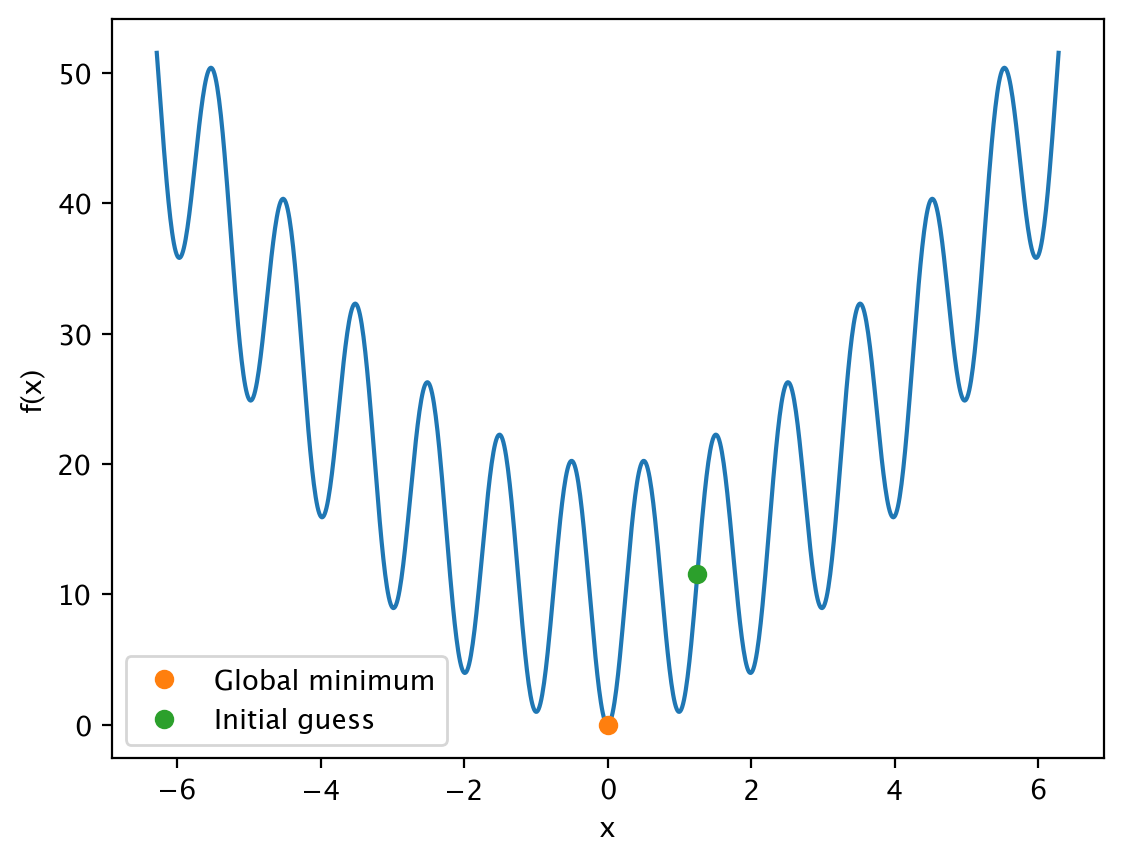

In [12]:
initial_guess = 1.25
init_f_x = oscillatory_quadratic(initial_guess)
f_x_at_min = oscillatory_quadratic(min_x)

plt.plot(x, f_x)
plt.plot(min_x, f_x_at_min, 'o', label='Global minimum')
plt.plot(initial_guess, init_f_x, 'o', label='Initial guess')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()
plt.show()

In this case, we were able to improve our initial guess because we knew where we **expected** the global minimum to be. This was possible due to the fact that we are dealing with a relatively simple one-dimensional function, but there is **no guarantee in general** that this will be possible.

The more general point here is that minimisation algorithms (such as those used by the `minimize` function) are not perfect and may well be **sensitive to the initial guess**. It is therefore prudent to think about what we know about the function that we are trying to minimise in order to select a **sensible** initial guess. For a trivial example, if we know that our function goes to $\infty$ for all $x > 5$, then we would obviously want our initial guess to be $< 5$.